# Data Storytelling

## Part 2: Sentiment Analysis
Customers reviews are written from a perspective subjective, but it does not mean that all information there is completely subjective. Each customer opinion contain valious hint to another future customer written more or less objectivily. How you could determine subjectivity of reviews? Could you measure how much positive, negative or neutral is the information of customer reviews? In this section, we will catch two properties of review data from Yelp customers: **polarity** and **subjectivity**.

Importing all the relevant packages

In [18]:
from textblob.sentiments import PatternAnalyzer
from textblob import TextBlob
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import re

We are using the **sentiment** function from **TextBlob** library to study *polarity* and *subjectivity* of data. According this function, polarity is between **-1 (negative result)** and **1 (positive result)** and subjectivity is between **0 (no subjective)** and **1 (absolutely subjective)**

In [2]:
def sentiment_parameters_Pattern(sentence):
    blob = TextBlob(sentence, analyzer=PatternAnalyzer())
    return blob.sentiment.polarity, blob.sentiment.subjectivity

Reading subset of 50 coffee shops (extracted by API request sent to **FUSION**). Each sample contain 3 reviews and the rating average of the coffee shop.

In [6]:
df = pd.read_csv('../Data_Extraction/reviews_yelp_api.csv', usecols=['Name', 'Rating','Description'])

In [7]:
id_coffee = []
coffee_store = []
rating = []
review = []
polarity_Pattern = []
subjectivity_Pattern = []

Calculating *polarity* and *subjectivity*:

In [8]:
for i in range(df.shape[0]):
    data = df.iloc[i, 2]
    paragrahp = data.split('.')
    paragrahp = [sentence.strip() for sentence in paragrahp]
    for sentence in paragrahp:
        p, s = sentiment_parameters_Pattern(sentence)
        id_coffee.append(i)
        coffee_store.append(df.iloc[i, 0])
        rating.append(df.iloc[i, 1])
        review.append(sentence)
        polarity_Pattern.append(p)
        subjectivity_Pattern.append(s)

Builind a dataframe with reviews split by every sentence

In [12]:
data_story = {'id': id_coffee, 'Coffee': coffee_store, 'Review': review, 'Rating': rating, 'Polarity_Pattern': polarity_Pattern, 'Subjectivity_Pattern': subjectivity_Pattern}
df_story = pd.DataFrame(data_story)

Remove special characters from sentences and empty cells

In [13]:
df_story = df_story[df_story['Review']!= '']
df_story['Review'] = [re.sub(r'[^a-zA-Z\s]','', sentence.lower()) for sentence in df_story['Review']]

In [14]:
df_story_filtered = df_story[df_story['Review']!= '']

Inspecting DataFrame, we find expressions as *amazing* and *great* with high polarity scores (positive) and high subjectivity.

In [47]:
df_story_filtered.head(10)

,id,Coffee,Review,Rating,Polarity_Pattern,Subjectivity_Pattern
0,0,Four Barrel Coffee,in love with the look and vibes here at four b...,4.0,0.500000,0.600000
1,0,Four Barrel Coffee,big bar for you to order when you walk into th...,4.0,0.000000,0.100000
2,0,Four Barrel Coffee,theres a smaller station off to the side and,4.0,0.000000,0.500000
5,0,Four Barrel Coffee,amazing coffee,4.0,0.600000,0.900000
6,0,Four Barrel Coffee,but so so so freaking busy all the time and re...,4.0,0.133333,0.333333
7,0,Four Barrel Coffee,nnthis place is huge but its so crowded,4.0,0.400000,0.900000
10,0,Four Barrel Coffee,great vibe,4.0,0.800000,0.750000
11,0,Four Barrel Coffee,we love the decor and the environment created ...,4.0,0.500000,0.600000
12,0,Four Barrel Coffee,nncoffee was perfect done with professionalism...,4.0,0.406250,0.750000
16,1,Réveille Coffee Co.,love the vibe in this cozy little space its ch...,4.0,0.066406,0.537500


Now, take a look of the following scatter plot. Each plotting point is a sentence from review to some coffee shop. We note that **polarity** is concentrated in neutral to positive patterns (there is more information between 0 and 1 *polarity pattern* than between -1 and 0, that represent negative polarity. Indeed, almost all data is located between -0.5 and 0.75 *polarity*. Aditionally, *subjectivity* is distributed between 0 and 1 with a clear tendency ascent from 0.2 *subjectivity*.

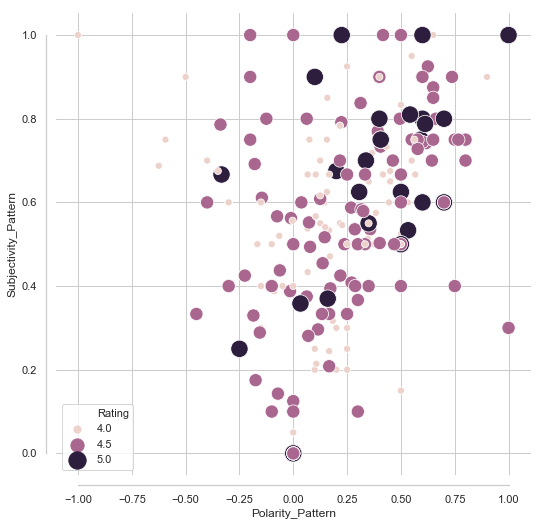

In [63]:
f, ax = plt.subplots(figsize=(8.5, 8.5))
sns.set_style("whitegrid")
data = df_story_filtered['Polarity_Pattern']
ax = sns.scatterplot(y='Subjectivity_Pattern', x='Polarity_Pattern',
                     hue="Rating", size="Rating", legend='full',
                     sizes=(50, 300),
                     data=df_story_filtered)
sns.despine(offset=10, trim=True)

What if we apply a linear Regression to data? Could we find a trend?

Look at the following graph, that join scatter, regression plot and histogram plots. Firsly, histograms reveal that for one hand, *polarity* is concentrated in positive values, as we mentioned after to analyse intuitivily the past graph and on the other hand, *subjectivity* is distributed along 0 and 1, with a significant part of data categorized as "less subjective". In other words, we find the data is majority positive but is little less subjective too. Then, we will get a lot of neutral or no extremely subjective information to analyse customers reviews.

Another interesting discover is the relation between subjectivity and polarity of data. Most positive sentences indicate more subjectivity too.

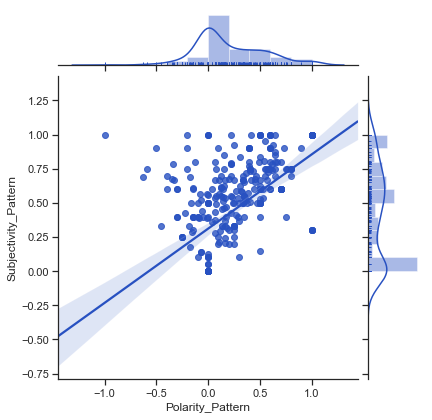

In [68]:
sns.set(style="ticks")

sns.jointplot(x='Polarity_Pattern', y='Subjectivity_Pattern', 
              data=df_story_filtered, kind='reg',
              marginal_kws=dict(bins=10, rug=True),
              #annot_kws=dict(stat="r"),
              #edgecolor="w", linewidth=1,
              color='#2851c1')

What is polarity pattern saying about the rating average of coffee shops?

The following graph shows polarity score of sentences and the rating average of the coffee shops in a density plot. We can see the patterns score with more concentration of and deviation of data too. Results are consistents, because they reveal that coffee with the highest rank presents less deviation that coffees with lowest rating. In fact, rating 4 and 4.5 have appreciable data between 0 and -1 *polarity*, the negative side. Also, three categories included a dense quantity of data in 0 *polarity* (or neutral data).

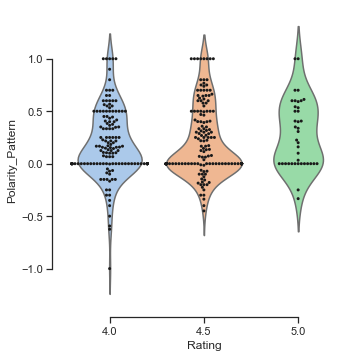

In [69]:
g = sns.catplot(x="Rating", y="Polarity_Pattern", kind="violin", data=df_story_filtered, inner=None, palette="pastel")
sns.swarmplot(x="Rating", y="Polarity_Pattern", color="k", size=3, data=df_story_filtered, ax=g.ax)
sns.despine(offset=10, trim=True)